Now we show how to combine basics in Notebook 1 to do some learning tasks. 

# Fisher's Iris dataset


In [1]:
import pandas as pd

# Load the Iris dataset as a Pandas dataframe
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# View the first 5 rows of the dataframe
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


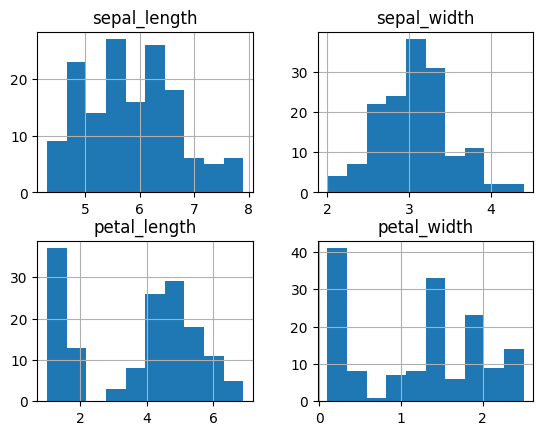

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


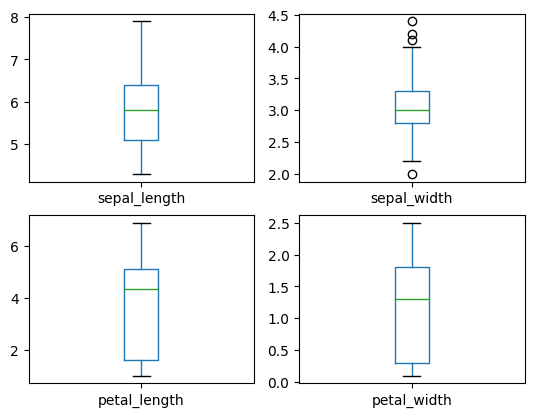

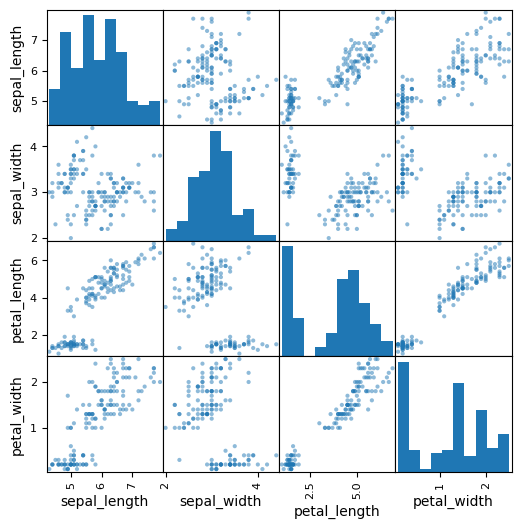

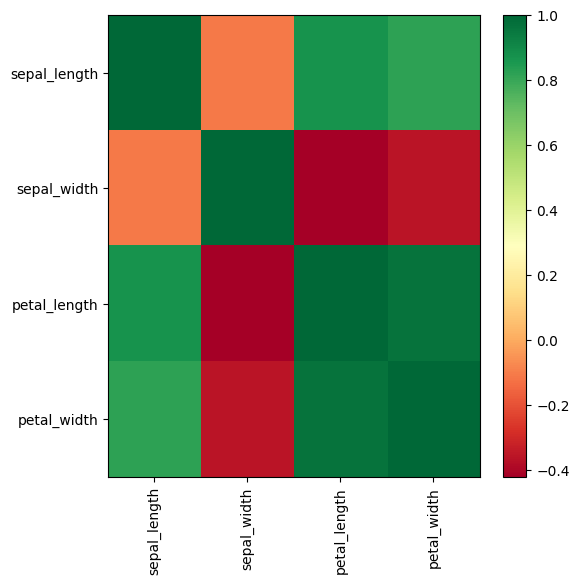

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Get an overview of the data
print(iris_df.info())

# Visualize the data with histograms
iris_df.hist()
plt.show()

# Check for missing values
print(iris_df.isnull().sum())

# Check for outliers with box plots
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Explore relationships between variables with scatter plots
pd.plotting.scatter_matrix(iris_df, figsize=(6, 6))
plt.show()

# Explore correlations between variables with a heatmap
corr = iris_df.corr()
plt.figure(figsize=(6,6))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns);
plt.show()


 # remark 

The data structure of the correlation matrix is a Pandas DataFrame. It is similar to a NumPy ndarray, but it has additional functionality such as the ability to specify row and column labels. You can access the elements of the matrix using indices or column names. You can also use various methods and functions to manipulate and analyze the data in the matrix. 

 you can use `corr.iloc[1,2]` to access the value of the Pearson correlation coefficient between the second and the third variables in a Pandas dataframe.

The iloc attribute is used to access elements of a Pandas dataframe by their integer indices. It works similarly to indexing in a NumPy array. In this case, `corr.iloc[1,2]` will return the element at the second row and third column of the correlation matrix.

In [3]:
corr.iloc[1,2]

-0.4205160964011539

# split the data

In [4]:
# Shuffle the rows
iris_df = iris_df.sample(frac=1)

# Split the data into a training set and a test set
split_index = int(0.8 * len(iris_df))
train_df = iris_df[:split_index]
test_df = iris_df[split_index:]

# Print the shapes of the training and test sets
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (120, 5)
Test shape: (30, 5)


In [5]:
# Summarize the fourth column
summary = iris_df.iloc[:,4].describe()

# Print the summary
print(summary)

count                150
unique                 3
top       Iris-virginica
freq                  50
Name: class, dtype: object


# train a linear classifier

To predict the class of Iris from its features (sepal width and so force), we use a simple softmax regression model. The model makes the hypothese that the conditional distribution of the class given the features is a softmax of a linear transformation of the feature vector. The linear transformation is represented by a matrix `W` and our goal is to use the training data to estimate `W`. The output vector is 3*1, each coordinate represents the probability of a particular class.  

We define a loss function and minimize the empirical risk corresponding to that loss. Typically people use cross entropy loss because then ERM is a convex-Lipschitz problem (thus local min= global min, GD algorithm converges etc).


In [6]:
import pandas as pd
import numpy as np

# Load the Iris dataset as a Pandas dataframe
#iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
 #                     names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Convert the class column to one-hot encoding
iris_df = pd.get_dummies(iris_df, columns=['class'])

# Shuffle the rows
iris_df = iris_df.sample(frac=1)

# Split the data into a training set and a test set
split_index = int(0.8 * len(iris_df))
train_df = iris_df[:split_index]
test_df = iris_df[split_index:]

# Extract the features and labels
X_train = train_df.drop(columns=['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']).values
y_train = train_df[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']].values
X_test = test_df.drop(columns=['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']).values
y_test = test_df[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']].values

# Number of samples and number of features
n_samples, n_features = X_train.shape

# Number of classes
n_classes = 3

# Initialize the weights and biases
W = np.random.randn(n_features, n_classes)
b = np.zeros(n_classes)

# Learning rate
lr = 0.01

# Number of epochs
n_epochs = 3000

# Loop over the epochs
for epoch in range(n_epochs):
    # Forward pass: compute the logits
    logits = X_train.dot(W) + b
    
    # Compute the softmax of the logits
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    
    # Compute the cross entropy loss
    loss = -np.sum(y_train * np.log(probs)) / n_samples
    
    # Backward pass: compute the gradients
    dW = X_train.T.dot(probs - y_train) / n_samples
    db = np.sum(probs - y_train, axis=0) / n_samples
    
    # Update the weights and biases
    W -= lr * dW
    b -= lr * db
    
    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss:.4f}')

# Evaluate the model on the test set
logits = X_test.dot(W) + b
probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
predictions = np.argmax(probs, axis=1)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Test accuracy: {accuracy:.4f}')




Epoch 0: loss = 10.1786
Epoch 100: loss = 1.0398
Epoch 200: loss = 0.6830
Epoch 300: loss = 0.5636
Epoch 400: loss = 0.5027
Epoch 500: loss = 0.4634
Epoch 600: loss = 0.4344
Epoch 700: loss = 0.4113
Epoch 800: loss = 0.3919
Epoch 900: loss = 0.3753
Epoch 1000: loss = 0.3605
Epoch 1100: loss = 0.3473
Epoch 1200: loss = 0.3354
Epoch 1300: loss = 0.3244
Epoch 1400: loss = 0.3144
Epoch 1500: loss = 0.3051
Epoch 1600: loss = 0.2965
Epoch 1700: loss = 0.2884
Epoch 1800: loss = 0.2809
Epoch 1900: loss = 0.2738
Epoch 2000: loss = 0.2672
Epoch 2100: loss = 0.2610
Epoch 2200: loss = 0.2551
Epoch 2300: loss = 0.2495
Epoch 2400: loss = 0.2442
Epoch 2500: loss = 0.2392
Epoch 2600: loss = 0.2345
Epoch 2700: loss = 0.2300
Epoch 2800: loss = 0.2257
Epoch 2900: loss = 0.2215
Test accuracy: 0.9333


In [7]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
118,7.7,2.6,6.9,2.3,0,0,1
117,7.7,3.8,6.7,2.2,0,0,1
98,5.1,2.5,3.0,1.1,0,1,0
123,6.3,2.7,4.9,1.8,0,0,1
0,5.1,3.5,1.4,0.2,1,0,0


# remark

The code convert pandas dataframe to numpy array before the gradient descent module because numpy array is a low level data structure and more efficient to compute. We also avoid using for loop as much as we can (e.g. the data X treated as a matrix) to speed up the computations. 